<a href="https://colab.research.google.com/github/ikirhmn/Analisis-Data-Aplikasi-Pengajuan-Rekomedasi-Barang-Diskominfo-Kota-Mataram/blob/main/Diskominfo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Diskominfo]
**Nama:** <br>I Gede Manik Ariyasa (F1D022046)<br>Lalu Olfata Vedora Zurji (F1D022046)<br>Rizki Rahman Maulana (F1D022046)


## Menentukan Pertanyaan Bisnis

- Pertanyaan Umum </br>
 1. Perangkat daerah mana yang paling banyak mengajukan rekomendasi pengadaan?

 2. Jenis rekomendasi apa yang paling umum diajukan?

 3. Paket (jenis barang) apa yang paling banyak diajukan?

 4. Berapa harga rata-rata suatu paket berdasarkan pagu anggaran yang diajukan ?


- Pertanyaan Strategis
 1. Apakah perangkat daerah tertentu cenderung mengajukan lebih banyak unit dibanding lainnya dan unit pada paket apa itu ?

 2. Perangkat daerah mana yang paling sering mengajukan anggaran tinggi?

 3. Apakah terdapat kecenderungan waktu tertentu (tahub anggaran) ketika pengajuan rekomendasi meningkat signifikan?

- Pertanyaan Operasional

 1. Berapa rata-rata waktu pemrosesan dari pengajuan ke perubahan (approval)?

 2. Apakah jenis rekomendasi tertentu diproses lebih cepat dibanding lainnya?

 3. Apakah jumlah dokumen mempengaruhi waktu proses pemeriksaan?

 4. Seberapa sering perangkat daerah mengajukan lebih dari satu paket?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
# Replace with the raw file URL from GitHub
url = "https://raw.githubusercontent.com/olfataVz/PKL-Diskominfo/main/data/Rekomendasi_fix.xlsx"


# Specify the engine explicitly (e.g., 'openpyxl' for .xlsx files)
df = pd.read_excel(url, engine='openpyxl')
df

,Perangkat Daerah,No. HP/WA,Dokumen,Jenis rekomendasi,Paket,Jumlah,Satuan,Tkdn,Peruntukan,Spesifikasi,Status,Keterangan,Pemeriksa,Pagu anggaran,Realisasi,Tanggal Pengajuan
0,Kelurahan Dayan Peken,NaN,"[{""id"":1027,""rekomendasi_id"":1,""jenis_dokumen_...",Pengadaan Barang/Jasa,Printer,1.0,Unit,NaN,NaN,"Canon Laser MF 3010|Function : Print, Scan, Co...",Pengajuan rekomendasi ditolak,Mohon diperbaiki,Shentin Abigail,"Rp5.000.000,00",NaN,"Okt 27, 2020 01:47:56"
1,Kelurahan Dayan Peken,NaN,"[{""id"":1028,""rekomendasi_id"":2,""jenis_dokumen_...",Pengadaan Barang/Jasa,PC,1.0,Unit,NaN,NaN,LENOVO AIO V 50a|Processor Intel Core i5-10400...,Pengajuan rekomendasi ditolak,Mohon diperbaiki,Shentin Abigail,"Rp15.000.000,00",NaN,"Okt 27, 2020 01:52:55"
2,Dinas Perumahan dan Kawasan Permukiman,NaN,"[{""id"":1029,""rekomendasi_id"":3,""jenis_dokumen_...",Pengadaan Barang/Jasa,Printer,1.0,Unit,NaN,NaN,"Printer Epson L6160 (print, scan, copy )|Print...",Hasil pemeriksaan terbit,NaN,Shentin Abigail,"Rp6.000.000,00",NaN,"Okt 27, 2020 03:00:57"
3,SMPN 14 Mataram,NaN,"[{""id"":1030,""rekomendasi_id"":4,""jenis_dokumen_...",Pengadaan Barang/Jasa,Acces Point,5.0,Paket,NaN,NaN,Projector Epson EB-S400|Technology: LCD Techno...,Pengajuan rekomendasi ditolak,"spesifikasinya lcd proyektor, tapi jenis baran...",NaN,"Rp30.000.000,00",NaN,"Okt 27, 2020 03:19:00"
4,Kelurahan Dasan Agung Baru,NaN,"[{""id"":1031,""rekomendasi_id"":5,""jenis_dokumen_...",Pengadaan Barang/Jasa,Laptop,1.0,Unit,NaN,NaN,ASUS E410MA-BV003T|Intel Celeron N4020|RAM : 4...,Hasil pemeriksaan terbit,NaN,Shentin Abigail,"Rp9.000.000,00",NaN,"Okt 27, 2020 08:12:06"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3203,SDN 38 Mataram,087865420838,"[{""id"":11056,""rekomendasi_id"":3206,""jenis_doku...",Pengadaan Barang/Jasa,Printer,1.0,Unit,26%,NaN,Printer Epson L121 (Printer Ecotank)|*Tipe*: P...,Tahap verifikasi oleh kepala bidang,NaN,NaN,"Rp2.827.500,00",NaN,"Apr 21, 2025 02:12:32"
3204,SDN 37 Mataram,082339926900,"[{""id"":11059,""rekomendasi_id"":3207,""jenis_doku...",Pengadaan Barang/Jasa,Laptop,1.0,Unit,40%,Pendidikan/Laboratorium,"AXIO|HYPE R 3|Intel Core I3|Layar OLED 14""|Win...",Menunggu tanda tangan kepala dinas,NaN,NaN,"Rp9.398.000,00",NaN,"Apr 21, 2025 05:40:32"
3205,SMPN 24 Mataram,085339201123,"[{""id"":11060,""rekomendasi_id"":3208,""jenis_doku...",Pengadaan Barang/Jasa,Laptop,1.0,Unit,"27,12",Pengolahan Data,• ACER Aspire Lite AL14-51M-31Y7 Intel Core ...,Tahap verifikasi oleh kepala bidang,NaN,NaN,"Rp10.000.000,00",NaN,"Apr 21, 2025 05:45:28"
3206,Bagian Umum,0817369569,"[{""id"":11078,""rekomendasi_id"":3209,""jenis_doku...",Pengadaan Barang/Jasa,PC,1.0,Unit,46.79%,Pengolahan Data,Acer Aspire AIO C24-1700|Intel Core i5-1235U|M...,Tahap verifikasi oleh kepala bidang,NaN,NaN,"Rp15.000.000,00",NaN,"Apr 22, 2025 01:47:28"


### Assessing Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3208 entries, 0 to 3207
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Perangkat Daerah   3208 non-null   object 
 1   No. HP/WA          1277 non-null   object 
 2   Dokumen            3208 non-null   object 
 3   Jenis rekomendasi  3208 non-null   object 
 4   Paket              3208 non-null   object 
 5   Jumlah             3206 non-null   float64
 6   Satuan             3208 non-null   object 
 7   Tkdn               1330 non-null   object 
 8   Peruntukan         659 non-null    object 
 9   Spesifikasi        3185 non-null   object 
 10  Status             3208 non-null   object 
 11  Keterangan         637 non-null    object 
 12  Pemeriksa          1949 non-null   object 
 13  Pagu anggaran      3208 non-null   object 
 14  Realisasi          751 non-null    object 
 15  Tanggal Pengajuan  3208 non-null   object 
dtypes: float64(1), object(15

**Insight:**
+ Jumlah (+)
+ Satuan (+)
+ Tkdn (Tingkat Komponen Dalam Negeri) (+)
+ Peruntukan (+)
+ Realisasi (+)
+ Keterangan (+) <br><br>

- Tanggal Perubahan (-)

In [ ]:
df.describe(include="all")

,Perangkat Daerah,No. HP/WA,Dokumen,Jenis rekomendasi,Paket,Jumlah,Satuan,Tkdn,Peruntukan,Spesifikasi,Status,Keterangan,Pemeriksa,Pagu anggaran,Realisasi,Tanggal Pengajuan
count,3208,1277,3208,3208,3208,3.206000e+03,3208,1330.0,659,3185,3208,637,1949,3208,751,3208
unique,294,355,3208,2,35,NaN,5,483.0,5,2989,8,507,13,748,295,3205
top,Badan Keuangan Daerah,081237170417,"[{""id"":11081,""rekomendasi_id"":3210,""jenis_doku...",Pengadaan Barang/Jasa,Laptop,NaN,Unit,0.0,Pengolahan Data,EPSON L120 Max Black Draft Text - Memo (A4) : ...,Hasil pemeriksaan terbit,sudah ada pengajuan yang sama,Moh. Nurchan,"Rp15.000.000,00","Rp15.000.000,00","Des 7, 2020 14:52:00"
freq,102,24,1,3162,883,NaN,2838,91.0,311,8,1912,48,633,253,61,2
mean,NaN,NaN,NaN,NaN,NaN,9.468821e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1.680592e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning Data

In [ ]:
df.drop(columns=["Spesifikasi"], inplace=True)
df.drop(columns=["No. HP/WA"], inplace=True)
df.drop(columns=["Tkdn"], inplace=True)
df.drop(columns=["Peruntukan"], inplace=True)
df.drop(columns=["Keterangan"], inplace=True)
df.drop(columns=["Pemeriksa"], inplace=True)
df.drop(columns=["Realisasi"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3208 entries, 0 to 3207
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Perangkat Daerah   3208 non-null   object 
 1   Dokumen            3208 non-null   object 
 2   Jenis rekomendasi  3208 non-null   object 
 3   Paket              3208 non-null   object 
 4   Jumlah             3206 non-null   float64
 5   Satuan             3208 non-null   object 
 6   Status             3208 non-null   object 
 7   Pagu anggaran      3208 non-null   object 
 8   Tanggal Pengajuan  3208 non-null   object 
dtypes: float64(1), object(8)
memory usage: 225.7+ KB


**Insight:**
- xxx
- xxx

In [ ]:
df[df['Jumlah'].isna()]

,Perangkat Daerah,Dokumen,Jenis rekomendasi,Paket,Jumlah,Satuan,Status,Pagu anggaran,Tanggal Pengajuan
107,SDN 5 Mataram,"[{""id"":1134,""rekomendasi_id"":108,""jenis_dokume...",Pengadaan Barang/Jasa,Acces Point,NaN,Paket,Pengajuan rekomendasi ditolak,"Rp1,00","Nov 19, 2020 02:20:11"
2321,Dinas Pertanian,"[{""id"":8105,""rekomendasi_id"":2324,""jenis_dokum...",Pengadaan Barang/Jasa,UPS,NaN,Unit,Pengajuan rekomendasi ditolak,"Rp2.700.000,00","Nov 9, 2023 08:29:26"


In [ ]:
df = df.dropna(subset=['Jumlah'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3206 entries, 0 to 3207
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Perangkat Daerah   3206 non-null   object 
 1   Dokumen            3206 non-null   object 
 2   Jenis rekomendasi  3206 non-null   object 
 3   Paket              3206 non-null   object 
 4   Jumlah             3206 non-null   float64
 5   Satuan             3206 non-null   object 
 6   Status             3206 non-null   object 
 7   Pagu anggaran      3206 non-null   object 
 8   Tanggal Pengajuan  3206 non-null   object 
dtypes: float64(1), object(8)
memory usage: 250.5+ KB


In [ ]:
import json

# Fungsi untuk ambil tanggal dari dokumen pemeriksaan
def extract_tanggal_pemeriksaan(doc_string):
    try:
        documents = json.loads(doc_string)
        for doc in documents:
            # Cek jika jenis dokumen adalah pemeriksaan HP
            if 'file_surat_pemeriksaan' in doc.get('file_surat', '') or doc.get('jenis_dokumen_id') == 7:
                return doc.get('tanggal_surat')
    except (json.JSONDecodeError, TypeError):
        return None
    return None

df.loc[:, "Tanggal Pemeriksaan"] = df["Dokumen"].apply(extract_tanggal_pemeriksaan)

<ipython-input-8-d9251aa720bd>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "Tanggal Pemeriksaan"] = df["Dokumen"].apply(extract_tanggal_pemeriksaan)


In [ ]:
# Convert 'Tanggal Pengajuan' to datetime, handling potential errors
df['Tanggal Pengajuan'] = pd.to_datetime(df['Tanggal Pengajuan'], errors='coerce', format='%b %d, %Y %H:%M:%S')

# Convert 'Tanggal Pemeriksaan' to datetime, handling potential errors
df['Tanggal Pemeriksaan'] = pd.to_datetime(df['Tanggal Pemeriksaan'], errors='coerce')

df.dtypes

<ipython-input-9-6b6789035878>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tanggal Pengajuan'] = pd.to_datetime(df['Tanggal Pengajuan'], errors='coerce', format='%b %d, %Y %H:%M:%S')
<ipython-input-9-6b6789035878>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tanggal Pemeriksaan'] = pd.to_datetime(df['Tanggal Pemeriksaan'], errors='coerce')


,0
Perangkat Daerah,object
Dokumen,object
Jenis rekomendasi,object
Paket,object
Jumlah,float64
Satuan,object
Status,object
Pagu anggaran,object
Tanggal Pengajuan,datetime64[ns]
Tanggal Pemeriksaan,datetime64[ns]


In [ ]:
# Ambil hanya bagian tanggal (YYYY-MM-DD) tanpa jam untuk kedua kolom
df.loc[:, "Tanggal Pengajuan"] = pd.to_datetime(df["Tanggal Pengajuan"]).dt.date
df.loc[:, "Tanggal Pemeriksaan"] = pd.to_datetime(df["Tanggal Pemeriksaan"]).dt.date

df.sample(5)

,Perangkat Daerah,Dokumen,Jenis rekomendasi,Paket,Jumlah,Satuan,Status,Pagu anggaran,Tanggal Pengajuan,Tanggal Pemeriksaan
2991,Kecamatan Mataram,"[{""id"":10275,""rekomendasi_id"":2994,""jenis_doku...",Pengadaan Barang/Jasa,Printer,3.0,Unit,Hasil pemeriksaan terbit,"Rp7.200.000,00",2024-11-11,2024-12-02
3148,Dinas Pekerjaan Umum dan Penataan Ruang,"[{""id"":10884,""rekomendasi_id"":3151,""jenis_doku...",Pengadaan Barang/Jasa,PC,1.0,Unit,Hasil pemeriksaan terbit,"Rp18.500.000,00",2025-02-21,2025-03-20
1127,Kecamatan Ampenan,"[{""id"":4405,""rekomendasi_id"":1128,""jenis_dokum...",Pengadaan Barang/Jasa,Laptop,10.0,Unit,Pengajuan rekomendasi ditolak,"Rp150.000.000,00",2022-04-06,NaT
442,SDN 04 Ampenan,"[{""id"":1469,""rekomendasi_id"":443,""jenis_dokume...",Pengadaan Barang/Jasa,Proyektor/LCD,1.0,Unit,Hasil pemeriksaan terbit,"Rp6.000.000,00",2021-06-16,2022-01-20
2824,Dinas Komunikasi dan Informatika,"[{""id"":9790,""rekomendasi_id"":2827,""jenis_dokum...",Pengadaan Barang/Jasa,CCTV,1.0,Paket,Hasil pemeriksaan terbit,"Rp25.000.000,00",NaT,2024-10-09


In [ ]:
# Hanya gunakan data tahun 2022 ke atas
df['Tanggal Pengajuan'] = pd.to_datetime(df['Tanggal Pengajuan'])

df = df[df['Tanggal Pengajuan'].dt.year >= 2022]

df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Perangkat Daerah     1455 non-null   object        
 1   Dokumen              1455 non-null   object        
 2   Jenis rekomendasi    1455 non-null   object        
 3   Paket                1455 non-null   object        
 4   Jumlah               1455 non-null   float64       
 5   Satuan               1455 non-null   object        
 6   Status               1455 non-null   object        
 7   Pagu anggaran        1455 non-null   object        
 8   Tanggal Pengajuan    1455 non-null   datetime64[ns]
 9   Tanggal Pemeriksaan  870 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 113.8+ KB


<ipython-input-11-71d72f509cb6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tanggal Pengajuan'] = pd.to_datetime(df['Tanggal Pengajuan'])


In [ ]:
print(df['Status'].unique())

['Hasil pemeriksaan terbit' 'Pengajuan rekomendasi ditolak'
 'Rekomendasi terbit' 'Pengajuan pemeriksaan ditolak'
 'Menunggu tanda tangan kepala dinas' 'Tahap pemeriksaan oleh petugas'
 'Tahap verifikasi oleh kepala bidang'
 'Pemberian draft nomor surat rekomendasi']


In [ ]:
# Hapus baris yang tidak sesuai dengan nilai Status yang ditentukan
df = df[df['Status'].isin(['Hasil pemeriksaan terbit', 'Rekomendasi terbit'])]
# Hapus baris dengan nilai NaT di kolom Tanggal Pemeriksaan
df = df[df['Tanggal Pemeriksaan'].notna()]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 870 entries, 0 to 1434
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Perangkat Daerah     870 non-null    object        
 1   Dokumen              870 non-null    object        
 2   Jenis rekomendasi    870 non-null    object        
 3   Paket                870 non-null    object        
 4   Jumlah               870 non-null    float64       
 5   Satuan               870 non-null    object        
 6   Status               870 non-null    object        
 7   Pagu anggaran        870 non-null    object        
 8   Tanggal Pengajuan    870 non-null    datetime64[ns]
 9   Tanggal Pemeriksaan  870 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 74.8+ KB


In [ ]:
def clean_anggaran(anggaran):
    if isinstance(anggaran, str):
        anggaran = anggaran.replace('Rp', '').replace('.', '').replace(',', '.').strip()
        try:
            return int(float(anggaran))
        except ValueError:
            return np.nan
    return anggaran

df['Pagu anggaran'] = df['Pagu anggaran'].apply(clean_anggaran)

df.dropna(subset=['Pagu anggaran'], inplace=True)

df = df[df['Pagu anggaran'] > 2022]

print(df['Pagu anggaran'])

0        8250000
1        3000000
2        7550000
3       19360000
4       19360000
          ...   
1410     5750000
1416    25000000
1424    17100000
1428     6500000
1434    29280000
Name: Pagu anggaran, Length: 846, dtype: int64


In [ ]:
# df.drop(columns=["Dokumen"], inplace=True)

In [ ]:
# Hanya gunakan data tahun 2022 ke atas
df['Tanggal Pengajuan'] = pd.to_datetime(df['Tanggal Pengajuan'])

df = df[df['Tanggal Pengajuan'].dt.year >= 2022]

df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Perangkat Daerah     846 non-null    object        
 1   Dokumen              846 non-null    object        
 2   Jenis rekomendasi    846 non-null    object        
 3   Paket                846 non-null    object        
 4   Jumlah               846 non-null    float64       
 5   Satuan               846 non-null    object        
 6   Status               846 non-null    object        
 7   Pagu anggaran        846 non-null    int64         
 8   Tanggal Pengajuan    846 non-null    datetime64[ns]
 9   Tanggal Pemeriksaan  846 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(6)
memory usage: 66.2+ KB


In [ ]:
df

,Perangkat Daerah,Dokumen,Jenis rekomendasi,Paket,Jumlah,Satuan,Status,Pagu anggaran,Tanggal Pengajuan,Tanggal Pemeriksaan
0,SDK Tunas Daud Cakranegara,"[{""id"":4101,""rekomendasi_id"":1007,""jenis_dokum...",Pengadaan Barang/Jasa,PC,1.0,Unit,Hasil pemeriksaan terbit,8250000,2022-01-02,2022-02-04
1,SDK Tunas Daud Cakranegara,"[{""id"":4102,""rekomendasi_id"":1008,""jenis_dokum...",Pengadaan Barang/Jasa,Printer,1.0,Unit,Hasil pemeriksaan terbit,3000000,2022-01-02,2022-02-04
2,SDN 42 AMPENAN,"[{""id"":4123,""rekomendasi_id"":1009,""jenis_dokum...",Pengadaan Barang/Jasa,Laptop,1.0,Unit,Hasil pemeriksaan terbit,7550000,2022-01-13,2022-05-23
3,SMPN 16 Mataram,"[{""id"":4124,""rekomendasi_id"":1010,""jenis_dokum...",Pengadaan Barang/Jasa,Laptop,1.0,Unit,Hasil pemeriksaan terbit,19360000,2022-01-13,2022-03-16
4,SMPN 16 Mataram,"[{""id"":4125,""rekomendasi_id"":1011,""jenis_dokum...",Pengadaan Barang/Jasa,Laptop,1.0,Unit,Hasil pemeriksaan terbit,19360000,2022-01-13,2022-03-16
...,...,...,...,...,...,...,...,...,...,...
841,SMPN 14 Mataram,"[{""id"":10934,""rekomendasi_id"":3166,""jenis_doku...",Pengadaan Barang/Jasa,Printer,1.0,Unit,Hasil pemeriksaan terbit,5750000,2025-03-05,2025-04-21
842,SDN 19 Cakranegara,"[{""id"":10952,""rekomendasi_id"":3172,""jenis_doku...",Pengadaan Barang/Jasa,CCTV,1.0,Paket,Hasil pemeriksaan terbit,25000000,2025-03-11,2025-04-22
843,Kecamatan Cakranegara,"[{""id"":10961,""rekomendasi_id"":3180,""jenis_doku...",Pengadaan Barang/Jasa,Laptop,1.0,Unit,Hasil pemeriksaan terbit,17100000,2025-03-13,2025-04-14
844,SDN 2 Cakranegara,"[{""id"":10982,""rekomendasi_id"":3184,""jenis_doku...",Pengadaan Barang/Jasa,Proyektor/LCD,1.0,Unit,Hasil pemeriksaan terbit,6500000,2025-03-14,2025-03-26


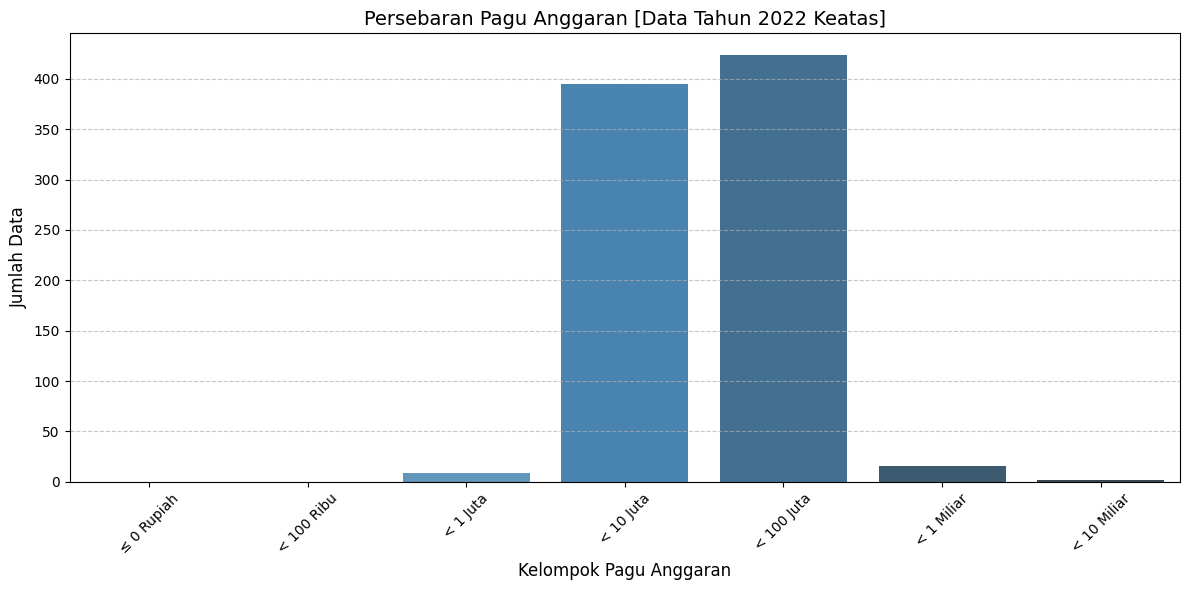

In [ ]:
# Definisikan batas-batas kelompok
bins = [-float('inf'), 0, 100_000, 1_000_000, 10_000_000, 100_000_000, 1_000_000_000, 10_000_000_000]
labels = [
    '≤ 0 Rupiah',
    '< 100 Ribu',
    '< 1 Juta',
    '< 10 Juta',
    '< 100 Juta',
    '< 1 Miliar',
    '< 10 Miliar'
]

# Mengelompokkan pagu anggaran menjadi kategori tanpa menambahkan kolom pada DataFrame
kelompok_pagu_anggaran = pd.cut(df['Pagu anggaran'], bins=bins, labels=labels)

# Menghitung jumlah data per kelompok
group_counts = pd.Series(kelompok_pagu_anggaran).value_counts().sort_index()

# Visualisasi distribusi kelompok pagu anggaran
group_df = group_counts.reset_index()
group_df.columns = ['Kelompok', 'Jumlah']

plt.figure(figsize=(12, 6))
sns.barplot(
    data=group_df,
    x='Kelompok',
    y='Jumlah',
    hue='Kelompok',
    palette='Blues_d',
    legend=False
)

plt.title('Persebaran Pagu Anggaran [Data Tahun 2022 Keatas]', fontsize=14)
plt.xlabel('Kelompok Pagu Anggaran', fontsize=12)
plt.ylabel('Jumlah Data', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Menampilkan jumlah per kelompok dalam format teks
for kelompok, jumlah in group_counts.items():
    print(f'{kelompok}: \t{jumlah}')

≤ 0 Rupiah: 	0
< 100 Ribu: 	0
< 1 Juta: 	9
< 10 Juta: 	395
< 100 Juta: 	424
< 1 Miliar: 	16
< 10 Miliar: 	2


In [ ]:
df_cleaned = df[kelompok_pagu_anggaran != '≤ 0 Rupiah']
df_cleaned = df[kelompok_pagu_anggaran != '≤ 100 Ribu']

In [ ]:
kelompok_pagu_anggaran_cleaned = pd.cut(df_cleaned['Pagu anggaran'], bins=bins, labels=labels)
group_counts_cleaned = pd.Series(kelompok_pagu_anggaran_cleaned).value_counts().sort_index()

group_df_cleaned = group_counts_cleaned.reset_index()
group_df_cleaned.columns = ['Kelompok', 'Jumlah']

print("\nDistribusi Kelompok Pagu Anggaran (Setelah Penghapusan ≤ 0 Rupiah):\n")
print(group_df_cleaned)


Distribusi Kelompok Pagu Anggaran (Setelah Penghapusan ≤ 0 Rupiah):

      Kelompok  Jumlah
0   ≤ 0 Rupiah       0
1   < 100 Ribu       0
2     < 1 Juta       9
3    < 10 Juta     395
4   < 100 Juta     424
5   < 1 Miliar      16
6  < 10 Miliar       2


## Exploratory Data Analysis (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Perangkat Daerah     846 non-null    object        
 1   Dokumen              846 non-null    object        
 2   Jenis rekomendasi    846 non-null    object        
 3   Paket                846 non-null    object        
 4   Jumlah               846 non-null    float64       
 5   Satuan               846 non-null    object        
 6   Status               846 non-null    object        
 7   Pagu anggaran        846 non-null    int64         
 8   Tanggal Pengajuan    846 non-null    datetime64[ns]
 9   Tanggal Pemeriksaan  846 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(6)
memory usage: 66.2+ KB


In [ ]:
df.head(5)

,Perangkat Daerah,Dokumen,Jenis rekomendasi,Paket,Jumlah,Satuan,Status,Pagu anggaran,Tanggal Pengajuan,Tanggal Pemeriksaan
0,SDK Tunas Daud Cakranegara,"[{""id"":4101,""rekomendasi_id"":1007,""jenis_dokum...",Pengadaan Barang/Jasa,PC,1.0,Unit,Hasil pemeriksaan terbit,8250000,2022-01-02,2022-02-04
1,SDK Tunas Daud Cakranegara,"[{""id"":4102,""rekomendasi_id"":1008,""jenis_dokum...",Pengadaan Barang/Jasa,Printer,1.0,Unit,Hasil pemeriksaan terbit,3000000,2022-01-02,2022-02-04
2,SDN 42 AMPENAN,"[{""id"":4123,""rekomendasi_id"":1009,""jenis_dokum...",Pengadaan Barang/Jasa,Laptop,1.0,Unit,Hasil pemeriksaan terbit,7550000,2022-01-13,2022-05-23
3,SMPN 16 Mataram,"[{""id"":4124,""rekomendasi_id"":1010,""jenis_dokum...",Pengadaan Barang/Jasa,Laptop,1.0,Unit,Hasil pemeriksaan terbit,19360000,2022-01-13,2022-03-16
4,SMPN 16 Mataram,"[{""id"":4125,""rekomendasi_id"":1011,""jenis_dokum...",Pengadaan Barang/Jasa,Laptop,1.0,Unit,Hasil pemeriksaan terbit,19360000,2022-01-13,2022-03-16


In [ ]:
df.describe(include="all")

,Perangkat Daerah,Dokumen,Jenis rekomendasi,Paket,Jumlah,Satuan,Status,Pagu anggaran,Tanggal Pengajuan,Tanggal Pemeriksaan
count,846,846,846,846,846.000000,846,846,8.460000e+02,846,846
unique,197,846,2,28,NaN,3,1,NaN,NaN,NaN
top,Dinas Komunikasi dan Informatika,"[{""id"":10999,""rekomendasi_id"":3190,""jenis_doku...",Pengadaan Barang/Jasa,Printer,NaN,Unit,Hasil pemeriksaan terbit,NaN,NaN,NaN
freq,32,1,842,220,NaN,787,846,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.650118,NaN,NaN,2.364437e+07,2023-08-07 05:55:44.680851200,2023-09-14 00:27:14.042553088
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,4.000000e+05,2022-01-02 00:00:00,2022-01-20 00:00:00
25%,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,5.759344e+06,2022-11-08 00:00:00,2022-11-30 00:00:00
50%,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.100000e+07,2023-09-12 00:00:00,2023-10-05 00:00:00
75%,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,1.800000e+07,2024-04-28 06:00:00,2024-07-03 00:00:00
max,NaN,NaN,NaN,NaN,375.000000,NaN,NaN,2.868750e+09,2025-03-19 00:00:00,2025-04-22 00:00:00


In [ ]:
print(df["Perangkat Daerah"].value_counts())

Perangkat Daerah
Dinas Komunikasi dan Informatika                          32
Badan Keuangan Daerah                                     28
Dinas Kearsipan dan Perpustakaan                          28
Dinas Penanaman Modal dan Pelayanan Terpadu Satu Pintu    26
Dinas Pendidikan                                          20
                                                          ..
SDN 12 Mataram                                             1
Kelurahan Mayura                                           1
Puskesmas Selaparang                                       1
Bagian Hukum                                               1
TKN Pembina Mataram                                        1
Name: count, Length: 197, dtype: int64


In [ ]:
first_let = df["Perangkat Daerah"].str.split().str[0]
print(first_let.value_counts())

Perangkat Daerah
Dinas          255
SDN            169
SMPN            71
Kelurahan       68
Kecamatan       65
Puskesmas       61
Badan           53
Bagian          37
SMP             18
SD              12
Inspektorat     11
UPT              7
Satuan           7
Rumah            4
SDK              2
UPTD             2
SMPK             2
Sekretariat      1
TKN              1
Name: count, dtype: int64


In [ ]:
# df_copy = df.copy()

mapping = {
    'Dinas': 'Pemerintah Daerah',
    'Badan': 'Pemerintah Daerah',
    'Bagian': 'Pemerintah Daerah',
    'Inspektorat': 'Pemerintah Daerah',
    'Sekretariat': 'Pemerintah Daerah',
    'Satuan': 'Pemerintah Daerah',
    'Kecamatan': 'Pemerintah Wilayah',
    'Kelurahan': 'Pemerintah Wilayah',
    'UPT': 'Unit Pelaksana Teknis',
    'UPTD': 'Unit Pelaksana Teknis',
    'SDN': 'Pendidikan',
    'SD': 'Pendidikan',
    'SDK': 'Pendidikan',
    'SMPN': 'Pendidikan',
    'SMP': 'Pendidikan',
    'SMPK': 'Pendidikan',
    'TKN': 'Pendidikan',
    'Puskesmas': 'Fasilitas Kesehatan',
    'Rumah': 'Fasilitas Kesehatan'
}

group_perangkat = first_let.map(mapping).fillna('Lainnya')
print(group_perangkat.value_counts())

Perangkat Daerah
Pemerintah Daerah        364
Pendidikan               275
Pemerintah Wilayah       133
Fasilitas Kesehatan       65
Unit Pelaksana Teknis      9
Name: count, dtype: int64


In [ ]:
print(df["Jenis rekomendasi"].value_counts())

Jenis rekomendasi
Pengadaan Barang/Jasa    842
Pengadaan Aplikasi         4
Name: count, dtype: int64


In [ ]:
print(df["Paket"].value_counts())

Paket
Printer                                    220
Laptop                                     219
PC                                         166
Proyektor/LCD                               66
Scanner                                     41
CCTV                                        21
Perangkat Komputer Lainnya                  20
Monitor                                     12
UPS                                         12
Hardisk External                             9
Layar Proyektor                              8
Router                                       6
Handphone                                    6
Tablet                                       5
Aplikasi                                     4
Server                                       4
Acces Point                                  4
Mesin Antrian                                4
Scanner (Peralatan Mini Komputer)            3
Switch                                       3
Lap Top                                      3
P.C Uni

In [ ]:

# Mapping berdasarkan nama lengkap pada df['Paket']
mapping_paket = {
    # Komputer & Aksesoris
    'Laptop': 'Komputer & Aksesoris',
    'Lap Top': 'Komputer & Aksesoris',
    'PC': 'Komputer & Aksesoris',
    'P.C Unit': 'Komputer & Aksesoris',
    'Monitor': 'Komputer & Aksesoris',
    'Hardisk External': 'Komputer & Aksesoris',
    'Tablet': 'Komputer & Aksesoris',
    'Tablet Pc': 'Komputer & Aksesoris',

    # Output
    'Printer': 'Perangkat Output',
    'Printer (Peralatan Personal Komputer)': 'Perangkat Output',
    'Proyektor/LCD': 'Perangkat Output',
    'Layar Proyektor': 'Perangkat Output',
    'LCD Projector/Infocus': 'Perangkat Output',
    'Webcam': 'Perangkat Output',

    # Input
    'Scanner': 'Perangkat Input',
    'Scanner (Peralatan Mini Komputer)': 'Perangkat Input',
    'Fingerprint (Absensi)': 'Perangkat Input',

    # Jaringan
    'Router': 'Perangkat Jaringan',
    'Switch': 'Perangkat Jaringan',
    'Kabel Utp': 'Perangkat Jaringan',
    'Modem': 'Perangkat Jaringan',
    'Acces Point': 'Perangkat Jaringan',
    'Peralatan Jaringan Lainnya': 'Perangkat Jaringan',

    # Keamanan
    'CCTV': 'Keamanan & Monitoring',
    'Cctv - Camera Control Television System': 'Keamanan & Monitoring',
    'Peralatan DVR': 'Keamanan & Monitoring',

    # Pendukung
    'UPS': 'Perangkat Pendukung',
    'UPS (Uninterruptible Power Supply)': 'Perangkat Pendukung',
    'Server': 'Perangkat Pendukung',

    # Software / Aplikasi
    'Software': 'Software & Aplikasi',
    'Aplikasi': 'Software & Aplikasi',

    # Lainnya
    'Mesin Antrian': 'Lainnya',
    'Handphone': 'Lainnya',
    'Perangkat Komputer Lainnya': 'Lainnya'
}

group_paket = df['Paket'].map(mapping_paket).fillna('Lainnya')
print(group_paket.value_counts())

Paket
Komputer & Aksesoris     416
Perangkat Output         298
Perangkat Input           44
Lainnya                   30
Keamanan & Monitoring     22
Perangkat Pendukung       18
Perangkat Jaringan        14
Software & Aplikasi        4
Name: count, dtype: int64


In [ ]:
# Mengganti nama paket dengan typo menggunakan .loc
df.loc[:, 'Paket'] = df['Paket'].replace({
    'Lap Top': 'Laptop',
    'UPS (Uninterruptible Power Supply)': 'UPS',
    'Scanner (Peralatan Mini Komputer)': 'Scanner',
    'P.C Unit': 'PC',
    'Layar Proyektor': 'Proyektor/LCD',
    'LCD Projector/Infocus': 'Proyektor/LCD',
    'Cctv - Camera Control Television System': 'CCTV',
    'Printer (Peralatan Personal Komputer)': 'Printer',
    'Acces Point': 'Access Point',
    'Peralatan Jaringan Lainnya': 'Perangkat Jaringan',
    'Kabel Utp': 'Kabel UTP',
    'Webcam': 'Webcam',
    'Modem': 'Modem'
})

# Menampilkan hasil perubahan
print(df['Paket'].value_counts())

Paket
Printer                       222
Laptop                        222
PC                            168
Proyektor/LCD                  75
Scanner                        44
CCTV                           22
Perangkat Komputer Lainnya     20
UPS                            14
Monitor                        12
Hardisk External                9
Router                          6
Handphone                       6
Tablet                          5
Server                          4
Aplikasi                        4
Access Point                    4
Mesin Antrian                   4
Switch                          3
Webcam                          1
Modem                           1
Name: count, dtype: int64


In [ ]:
date_range_counts = df.groupby(pd.Grouper(key="Tanggal Pengajuan", freq="ME"))["Tanggal Pengajuan"].count()
date_range_counts

,Tanggal Pengajuan
Tanggal Pengajuan,
2022-01-31,7
2022-02-28,7
2022-03-31,19
2022-04-30,32
2022-05-31,0
2022-06-30,25
2022-07-31,44
2022-08-31,0
2022-09-30,25


In [ ]:
average_monthly_budget = df[df['Pagu anggaran'] > 0].groupby(pd.Grouper(key='Tanggal Pengajuan', freq='ME'))['Pagu anggaran'].mean()
average_monthly_budget = average_monthly_budget.apply(lambda x: f"Rp. {x:,.0f}".replace(",", "."))

average_monthly_budget

,Pagu anggaran
Tanggal Pengajuan,
2022-01-31,Rp. 9.994.000
2022-02-28,Rp. 32.207.143
2022-03-31,Rp. 17.805.537
2022-04-30,Rp. 163.193.162
2022-05-31,Rp. nan
2022-06-30,Rp. 12.783.146
2022-07-31,Rp. 14.450.875
2022-08-31,Rp. nan
2022-09-30,Rp. 15.853.280


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

## Pertanyaan Umum

### Pertanyaan 1: <br>Perangkat daerah yang paling banyak mengajukan rekomendasi pengadaan

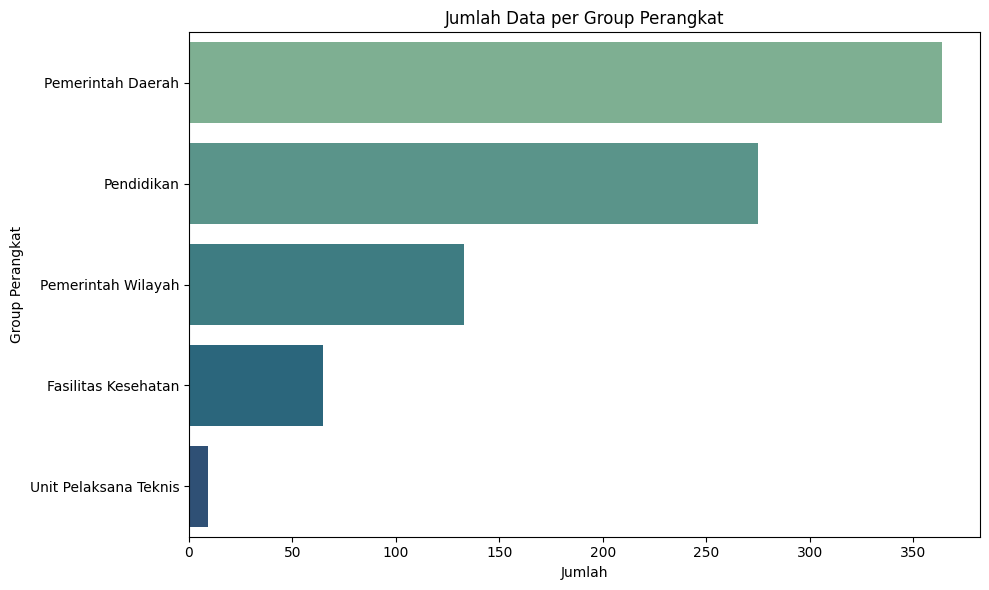

In [ ]:
group_counts = group_perangkat.value_counts().reset_index()
group_counts.columns = ['Group Perangkat', 'Jumlah']

plt.figure(figsize=(10, 6))
sns.barplot(data=group_counts,
    x='Jumlah',
    y='Group Perangkat',
    hue='Group Perangkat',
    palette='crest',
    legend=False
)

plt.title('Jumlah Data per Group Perangkat')
plt.xlabel('Jumlah')
plt.ylabel('Group Perangkat')
plt.tight_layout()
plt.show()

In [ ]:
print(group_perangkat.value_counts())

Perangkat Daerah
Pemerintah Daerah        364
Pendidikan               275
Pemerintah Wilayah       133
Fasilitas Kesehatan       65
Unit Pelaksana Teknis      9
Name: count, dtype: int64


In [ ]:
print(f"Perangkat daerah terbanyak yaitu: [{group_perangkat.value_counts().idxmax()}], dengan total permintaan: {group_perangkat.value_counts().max()}")
print(f"Dengan spesifik yaitu pada [{df['Perangkat Daerah'].value_counts().idxmax()}], dengan total permintaan sebanyak: {df['Perangkat Daerah'].value_counts().max()}")

Perangkat daerah terbanyak yaitu: [Pemerintah Daerah], dengan total permintaan: 364
Dengan spesifik yaitu pada [Dinas Komunikasi dan Informatika], dengan total permintaan sebanyak: 32


### Pertanyaan 2: Jenis rekomendasi yang paling umum diajukan

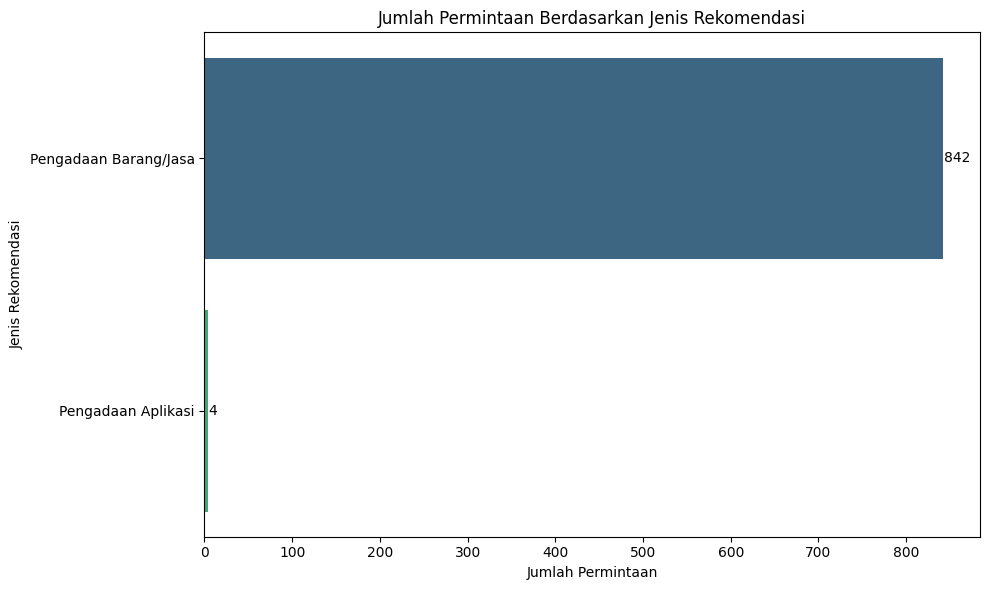

In [ ]:
rekom_counts = df["Jenis rekomendasi"].value_counts().reset_index()
rekom_counts.columns = ["Jenis Rekomendasi", "Jumlah"]

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=rekom_counts,
    x="Jumlah",
    y="Jenis Rekomendasi",
    hue="Jenis Rekomendasi",
    palette="viridis",
    legend=False
)

for i in ax.patches:
    ax.text(
        i.get_width() + 1,
        i.get_y() + i.get_height() / 2,
        f"{int(i.get_width())}",
        va='center'
    )

plt.title("Jumlah Permintaan Berdasarkan Jenis Rekomendasi")
plt.xlabel("Jumlah Permintaan")
plt.ylabel("Jenis Rekomendasi")
plt.tight_layout()
plt.show()

**Insight:**
- xxx
- xxx

### Pertanyaan 3: Paket/jenis barang yang paling banyak diajukan

In [ ]:
print(group_paket.value_counts())

Paket
Komputer & Aksesoris     416
Perangkat Output         298
Perangkat Input           44
Lainnya                   30
Keamanan & Monitoring     22
Perangkat Pendukung       18
Perangkat Jaringan        14
Software & Aplikasi        4
Name: count, dtype: int64


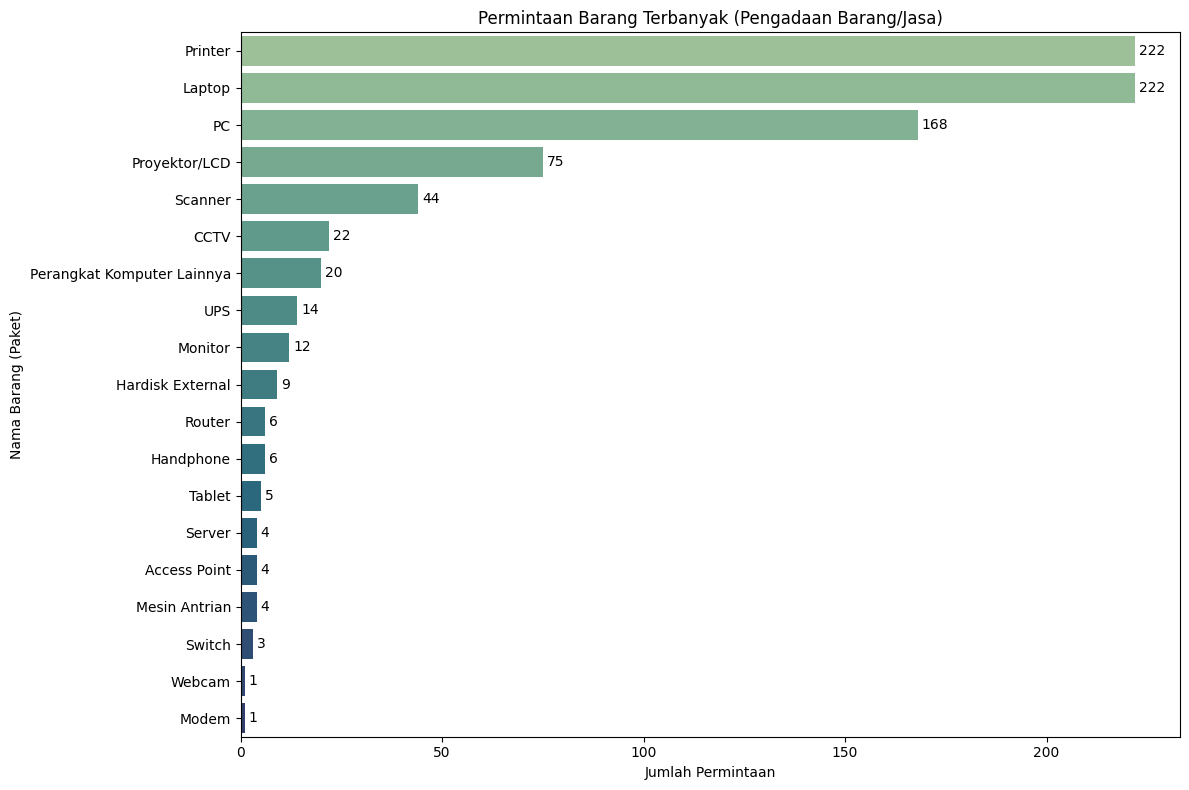

In [ ]:
df_pengadaan = df[df["Jenis rekomendasi"] == "Pengadaan Barang/Jasa"]

paket_counts = df_pengadaan["Paket"].value_counts().reset_index()
paket_counts.columns = ["Paket", "Jumlah"]

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=paket_counts,
    x="Jumlah",
    y="Paket",
    hue="Paket",
    palette="crest",
    legend=False
)

for i in ax.patches:
    ax.text(
        i.get_width() + 1,
        i.get_y() + i.get_height() / 2,
        f"{int(i.get_width())}",
        va="center"
    )

plt.title("Permintaan Barang Terbanyak (Pengadaan Barang/Jasa)")
plt.xlabel("Jumlah Permintaan")
plt.ylabel("Nama Barang (Paket)")
plt.tight_layout()
plt.show()

**Insight:**
- xxx
- xxx

### Pertanyaan 4: Berapa harga rata-rata suatu paket berdasarkan pagu anggaran yang diajukan

In [ ]:
# Hitung total pagu dan jumlah total per paket
rata_rata_anggaran = df.groupby("Paket").agg({
    "Pagu anggaran": "sum",
    "Jumlah": "sum"
}).reset_index()

# Hitung rata-rata per unit per Paket
rata_rata_anggaran = df.groupby("Paket").apply(
    lambda x: x["Pagu anggaran"].sum() / x["Jumlah"].sum()
).to_dict()

# Tambahkan kolom 'rata_anggaran' ke df
df["rata_anggaran"] = df["Paket"].map(rata_rata_anggaran)

# Format jika mau ditampilkan sebagai rupiah
df["rata_anggaran_rp"] = df["rata_anggaran"].apply(lambda x: f"Rp. {x:,.0f}".replace(",", "."))
df[["Paket", "Jumlah", "Pagu anggaran", "rata_anggaran", "rata_anggaran_rp"]].sample(20)


<ipython-input-40-8bc2a89d4552>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rata_rata_anggaran = df.groupby("Paket").apply(


,Paket,Jumlah,Pagu anggaran,rata_anggaran,rata_anggaran_rp
629,PC,3.0,45000000,1.349476e+07,Rp. 13.494.765
819,Printer,5.0,11750000,4.366040e+06,Rp. 4.366.040
671,Scanner,3.0,18000000,7.460513e+06,Rp. 7.460.513
748,PC,1.0,10000000,1.349476e+07,Rp. 13.494.765
105,Laptop,1.0,12794000,9.435471e+06,Rp. 9.435.471
552,CCTV,1.0,15000000,1.451814e+07,Rp. 14.518.142
39,Printer,1.0,6000000,4.366040e+06,Rp. 4.366.040
255,Printer,1.0,4500000,4.366040e+06,Rp. 4.366.040
480,Laptop,1.0,9000000,9.435471e+06,Rp. 9.435.471
305,Laptop,1.0,10000000,9.435471e+06,Rp. 9.435.471


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Perangkat Daerah     846 non-null    object        
 1   Dokumen              846 non-null    object        
 2   Jenis rekomendasi    846 non-null    object        
 3   Paket                846 non-null    object        
 4   Jumlah               846 non-null    float64       
 5   Satuan               846 non-null    object        
 6   Status               846 non-null    object        
 7   Pagu anggaran        846 non-null    int64         
 8   Tanggal Pengajuan    846 non-null    datetime64[ns]
 9   Tanggal Pemeriksaan  846 non-null    datetime64[ns]
 10  rata_anggaran        846 non-null    float64       
 11  rata_anggaran_rp     846 non-null    object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 79.4+ KB


## Pertanyaan Strategis

### Pertanyaan 1: Apakah perangkat daerah tertentu cenderung mengajukan lebih banyak unit dibanding lainnya dan unit pada paket apa itu ?

In [ ]:
total_unit_per_daerah = df.groupby("Perangkat Daerah")["Jumlah"].sum().reset_index()
top_10_daerah = total_unit_per_daerah.sort_values(by="Jumlah", ascending=False).head(10)
hasil = []

for idx, row in top_10_daerah.iterrows():
    daerah = row["Perangkat Daerah"]
    total_jumlah = int(row["Jumlah"])
    data_daerah = df[df["Perangkat Daerah"] == daerah]

    paket_terbanyak = (
        data_daerah.groupby("Paket")["Jumlah"]
        .sum()
        .reset_index()
        .sort_values(by="Jumlah", ascending=False)
        .iloc[0]
    )

    hasil.append({
        "Perangkat Daerah": daerah,
        "Total Jumlah Unit": total_jumlah,
        "Paket Terbanyak": paket_terbanyak["Paket"],
        "Jumlah Paket Terbanyak": int(paket_terbanyak["Jumlah"])
    })

df_hasil = pd.DataFrame(hasil)
df_hasil.index = range(1, len(df_hasil) + 1)

df_hasil


,Perangkat Daerah,Total Jumlah Unit,Paket Terbanyak,Jumlah Paket Terbanyak
1,Dinas Pendidikan,804,Laptop,641
2,Badan Keuangan Daerah,128,Handphone,47
3,Rumah Sakit Umum Daerah Kelas B,68,PC,60
4,Dinas Penanaman Modal dan Pelayanan Terpadu Sa...,55,Printer,27
5,Inspektorat,52,Printer,15
6,Dinas Kependudukan dan Pencatatan Sipil,46,PC,14
7,Dinas Kearsipan dan Perpustakaan,45,PC,15
8,Dinas Pekerjaan Umum dan Penataan Ruang,40,Printer,13
9,Dinas Komunikasi dan Informatika,37,Printer,10
10,Kecamatan Cakranegara,29,Laptop,16


### Pertanyaan 2: Perangkat daerah mana yang paling sering mengajukan anggaran tinggi?

In [ ]:
# Ambil 10 perangkat daerah dengan pagu anggaran tertinggi
top_10_anggaran = df.groupby("Perangkat Daerah")["Pagu anggaran"] \
                    .sum().sort_values(ascending=False).head(10) \
                    .reset_index()

# Simpan nilai asli untuk analisis selanjutnya (jika perlu)
top_10_anggaran["Pagu anggaran asli"] = top_10_anggaran["Pagu anggaran"]

# Format nilai rupiah
top_10_anggaran["Pagu anggaran"] = top_10_anggaran["Pagu anggaran"] \
    .apply(lambda x: f"Rp. {x:,.0f}".replace(",", "."))

# Set indeks mulai dari 1
top_10_anggaran.index = range(1, len(top_10_anggaran) + 1)

# Tampilkan hasil sebagai DataFrame
top_10_anggaran[["Perangkat Daerah", "Pagu anggaran"]]

,Perangkat Daerah,Pagu anggaran
1,Dinas Pendidikan,Rp. 5.496.415.000
2,Badan Keuangan Daerah,Rp. 1.486.865.875
3,Dinas Kependudukan dan Pencatatan Sipil,Rp. 836.217.500
4,Rumah Sakit Umum Daerah Kelas B,Rp. 608.791.600
5,Dinas Penanaman Modal dan Pelayanan Terpadu Sa...,Rp. 541.114.840
6,Dinas Kearsipan dan Perpustakaan,Rp. 462.459.000
7,Dinas Komunikasi dan Informatika,Rp. 441.839.125
8,Inspektorat,Rp. 405.925.000
9,Dinas Pekerjaan Umum dan Penataan Ruang,Rp. 391.400.000
10,Badan Perencanaan Pembangunan Daerah,Rp. 378.333.850


<ipython-input-44-21f20b943d37>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


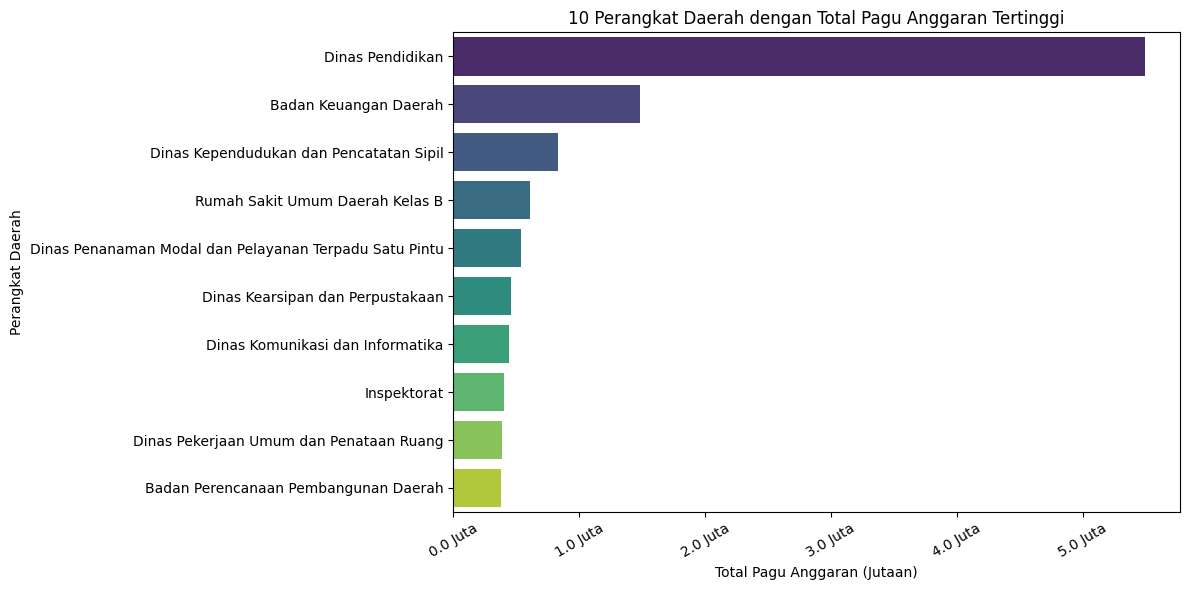

In [ ]:
from matplotlib.ticker import FuncFormatter

def juta_format(x, _):
    return f'{x/1_000_000_000:.1f} Juta'

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x="Pagu anggaran asli",
    y="Perangkat Daerah",
    data=top_10_anggaran,
    palette="viridis"
)

# Format sumbu X
plt.gca().xaxis.set_major_formatter(FuncFormatter(juta_format))
plt.xticks(rotation=30)  # Miring 30 derajat

plt.title("10 Perangkat Daerah dengan Total Pagu Anggaran Tertinggi")
plt.xlabel("Total Pagu Anggaran (Jutaan)")
plt.ylabel("Perangkat Daerah")
plt.tight_layout()
plt.show()

**Insight:**
- xxx
- xxx

### Pertanyaan 3: Apakah terdapat kecenderungan waktu tertentu (tahub anggaran) ketika pengajuan rekomendasi meningkat signifikan?

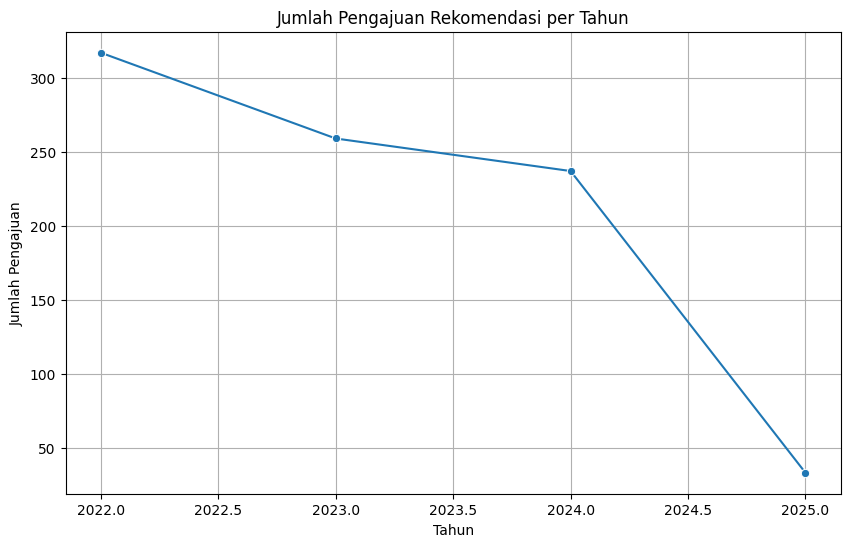

,Tanggal Pengajuan
Tanggal Pengajuan,
2022,317
2023,259
2024,237
2025,33


In [ ]:
yearly_recommendations = df.groupby(df['Tanggal Pengajuan'].dt.year)['Tanggal Pengajuan'].count()

plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_recommendations.index, y=yearly_recommendations.values, marker='o')
plt.title('Jumlah Pengajuan Rekomendasi per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pengajuan')
plt.grid(True)
plt.show()

yearly_recommendations


## Pertanyaan Operasional

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Perangkat Daerah     846 non-null    object        
 1   Dokumen              846 non-null    object        
 2   Jenis rekomendasi    846 non-null    object        
 3   Paket                846 non-null    object        
 4   Jumlah               846 non-null    float64       
 5   Satuan               846 non-null    object        
 6   Status               846 non-null    object        
 7   Pagu anggaran        846 non-null    int64         
 8   Tanggal Pengajuan    846 non-null    datetime64[ns]
 9   Tanggal Pemeriksaan  846 non-null    datetime64[ns]
 10  rata_anggaran        846 non-null    float64       
 11  rata_anggaran_rp     846 non-null    object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 79.4+ KB


### Pertanyaan 1: Berapa rata-rata waktu pemrosesan dari pengajuan ke perubahan (approval)?

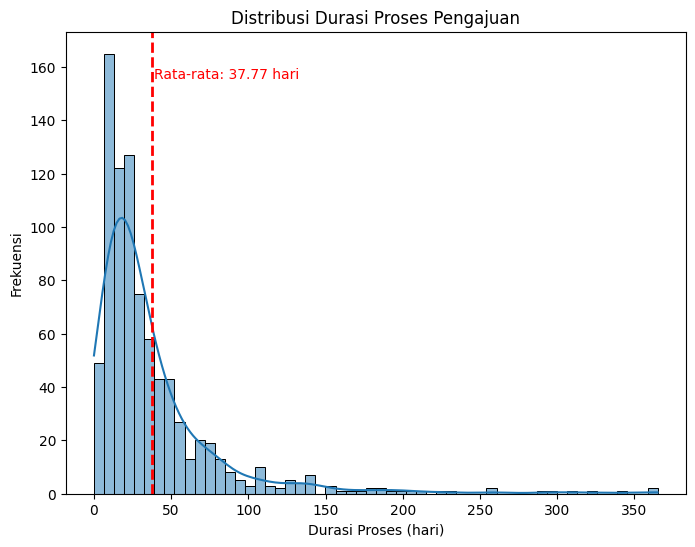

Rata-rata Durasi Proses dari pengajuan ke pemeriksaan (approval) adalah: 37.77 hari


In [ ]:
df["Durasi Proses"] = (df["Tanggal Pemeriksaan"] - df["Tanggal Pengajuan"]).dt.days

rata_rata_waktu_proses = df['Durasi Proses'].mean()

plt.figure(figsize=(8, 6))
sns.histplot(df['Durasi Proses'], kde=True)
plt.axvline(rata_rata_waktu_proses, color='red', linestyle='dashed', linewidth=2)
plt.title('Distribusi Durasi Proses Pengajuan')
plt.xlabel('Durasi Proses (hari)')
plt.ylabel('Frekuensi')
plt.text(rata_rata_waktu_proses + 1, plt.ylim()[1] * 0.9, f'Rata-rata: {rata_rata_waktu_proses:.2f} hari', color='red')
plt.show()

print(f"Rata-rata Durasi Proses dari pengajuan ke pemeriksaan (approval) adalah: {rata_rata_waktu_proses:.2f} hari")


### Pertanyaan 2: Apakah jenis rekomendasi tertentu diproses lebih cepat dibanding lainnya?

<ipython-input-48-96cd71e6eed8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Jenis rekomendasi', y='Durasi Proses', data=processing_time_by_recommendation, palette='viridis')


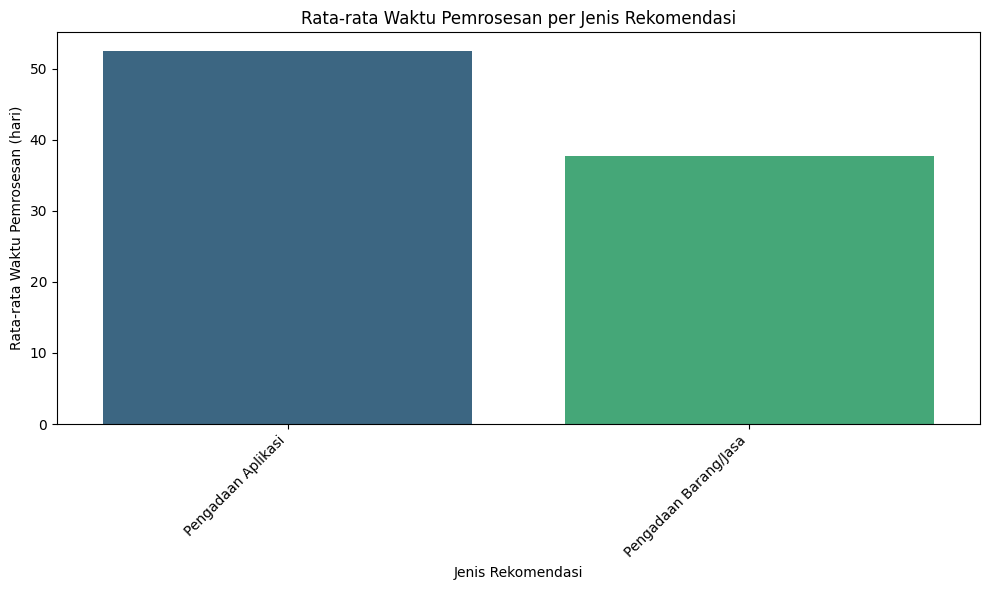

In [ ]:
processing_time_by_recommendation = df.groupby('Jenis rekomendasi')['Durasi Proses'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Jenis rekomendasi', y='Durasi Proses', data=processing_time_by_recommendation, palette='viridis')
plt.title('Rata-rata Waktu Pemrosesan per Jenis Rekomendasi')
plt.xlabel('Jenis Rekomendasi')
plt.ylabel('Rata-rata Waktu Pemrosesan (hari)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insight:**
- xxx
- xxx

### Pertanyaan 3: Seberapa sering perangkat daerah mengajukan lebih dari satu paket?

<Figure size 1200x600 with 0 Axes>

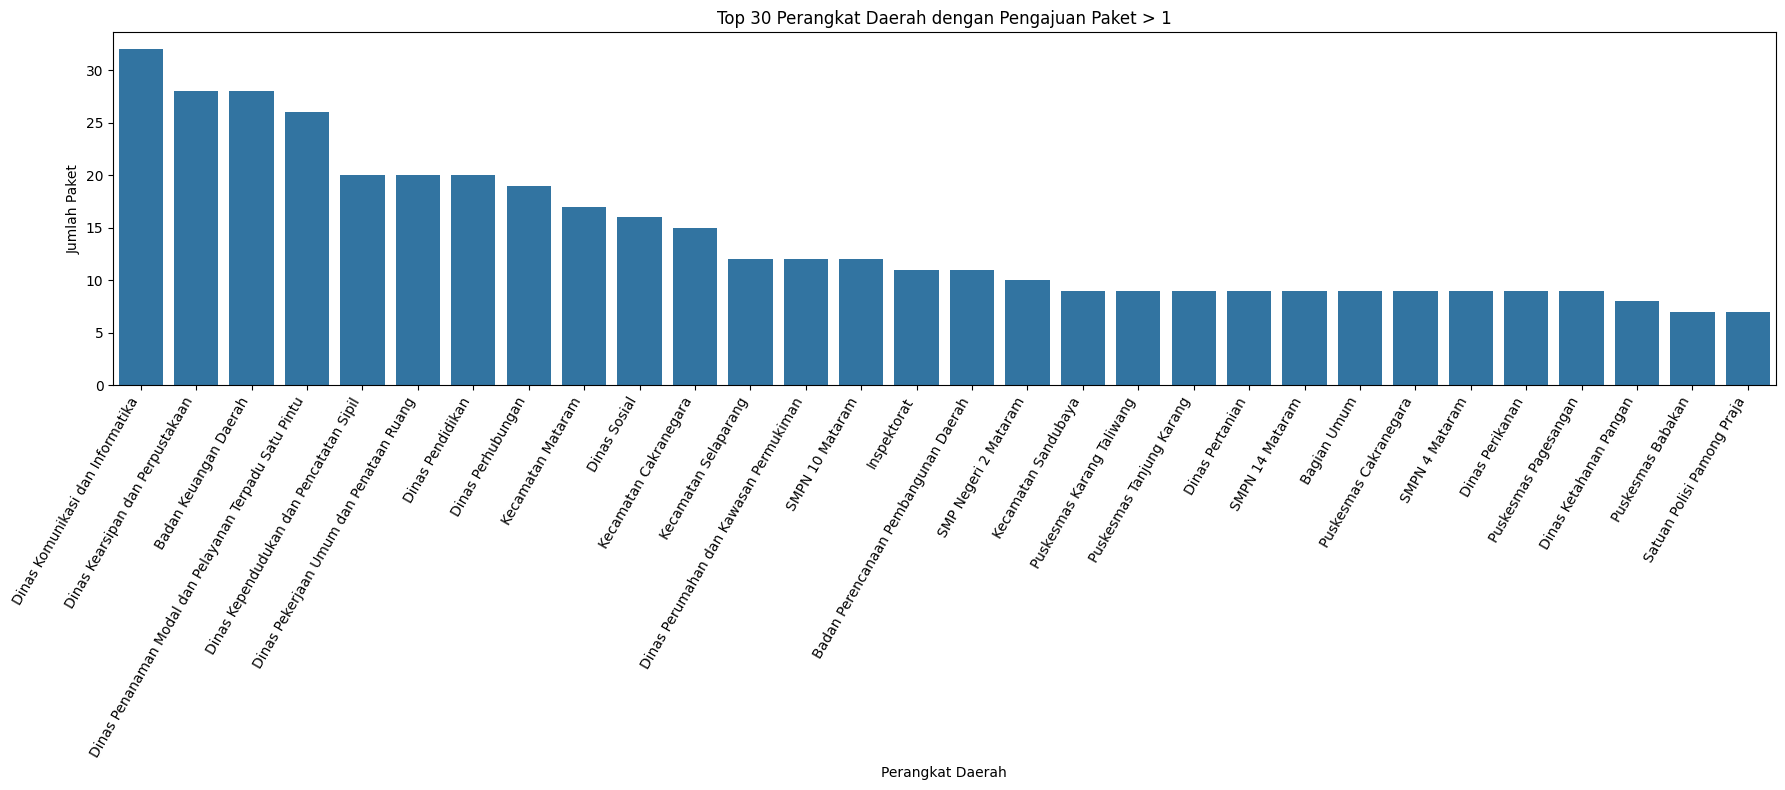

In [ ]:
multiple_packages = df.groupby('Perangkat Daerah')['Paket'].count()
multiple_packages = multiple_packages[multiple_packages > 1]

plt.figure(figsize=(12, 6))
filtered_df = (
    df[df['Perangkat Daerah'].isin(multiple_packages.index)]
    .groupby('Perangkat Daerah')
    .filter(lambda x: len(x) > 1)
)


plt.figure(figsize=(18, 8))
sns.countplot(data=filtered_df, x='Perangkat Daerah', order=filtered_df['Perangkat Daerah'].value_counts().index[:30])
plt.xticks(rotation=60, ha='right')
plt.title('Top 30 Perangkat Daerah dengan Pengajuan Paket > 1')
plt.xlabel('Perangkat Daerah')
plt.ylabel('Jumlah Paket')
plt.tight_layout()
plt.show()


## Analisis Lanjutan (Opsional)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Perangkat Daerah     846 non-null    object        
 1   Dokumen              846 non-null    object        
 2   Jenis rekomendasi    846 non-null    object        
 3   Paket                846 non-null    object        
 4   Jumlah               846 non-null    float64       
 5   Satuan               846 non-null    object        
 6   Status               846 non-null    object        
 7   Pagu anggaran        846 non-null    int64         
 8   Tanggal Pengajuan    846 non-null    datetime64[ns]
 9   Tanggal Pemeriksaan  846 non-null    datetime64[ns]
 10  rata_anggaran        846 non-null    float64       
 11  rata_anggaran_rp     846 non-null    object        
 12  Durasi Proses        846 non-null    int64         
dtypes: datetime64[ns](2), float64(2), i

In [ ]:
# Pembuatan kolom target
df['harga_per_unit'] = df['Pagu anggaran'] / df['Jumlah']

toleransi = 0.10

# Fungsi untuk menentukan kategori target
def tentukan_target(row):
    lower_bound = row['rata_anggaran'] * (1 - toleransi)
    upper_bound = row['rata_anggaran'] * (1 + toleransi)

    if lower_bound <= row['harga_per_unit'] <= upper_bound:
        return 'Logis'
    elif row['harga_per_unit'] > upper_bound:
        return 'Diatas Rata-rata'
    else:
        return 'Dibawah Rata-rata'

# Terapkan fungsi ke DataFrame
df['klasifikasi'] = df.apply(tentukan_target, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Perangkat Daerah     846 non-null    object        
 1   Dokumen              846 non-null    object        
 2   Jenis rekomendasi    846 non-null    object        
 3   Paket                846 non-null    object        
 4   Jumlah               846 non-null    float64       
 5   Satuan               846 non-null    object        
 6   Status               846 non-null    object        
 7   Pagu anggaran        846 non-null    int64         
 8   Tanggal Pengajuan    846 non-null    datetime64[ns]
 9   Tanggal Pemeriksaan  846 non-null    datetime64[ns]
 10  rata_anggaran        846 non-null    float64       
 11  rata_anggaran_rp     846 non-null    object        
 12  Durasi Proses        846 non-null    int64         
 13  harga_per_unit       846 non-null  

In [ ]:
df.drop(columns=["harga_per_unit"], inplace=True)
df.drop(columns=["Satuan"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Perangkat Daerah     846 non-null    object        
 1   Dokumen              846 non-null    object        
 2   Jenis rekomendasi    846 non-null    object        
 3   Paket                846 non-null    object        
 4   Jumlah               846 non-null    float64       
 5   Status               846 non-null    object        
 6   Pagu anggaran        846 non-null    int64         
 7   Tanggal Pengajuan    846 non-null    datetime64[ns]
 8   Tanggal Pemeriksaan  846 non-null    datetime64[ns]
 9   rata_anggaran        846 non-null    float64       
 10  rata_anggaran_rp     846 non-null    object        
 11  Durasi Proses        846 non-null    int64         
 12  klasifikasi          846 non-null    object        
dtypes: datetime64[ns](2), float64(2), i

In [ ]:
df.head(10)

,Perangkat Daerah,Dokumen,Jenis rekomendasi,Paket,Jumlah,Status,Pagu anggaran,Tanggal Pengajuan,Tanggal Pemeriksaan,rata_anggaran,rata_anggaran_rp,Durasi Proses,klasifikasi
0,SDK Tunas Daud Cakranegara,"[{""id"":4101,""rekomendasi_id"":1007,""jenis_dokum...",Pengadaan Barang/Jasa,PC,1.0,Hasil pemeriksaan terbit,8250000,2022-01-02,2022-02-04,1.349476e+07,Rp. 13.494.765,33,Dibawah Rata-rata
1,SDK Tunas Daud Cakranegara,"[{""id"":4102,""rekomendasi_id"":1008,""jenis_dokum...",Pengadaan Barang/Jasa,Printer,1.0,Hasil pemeriksaan terbit,3000000,2022-01-02,2022-02-04,4.366040e+06,Rp. 4.366.040,33,Dibawah Rata-rata
2,SDN 42 AMPENAN,"[{""id"":4123,""rekomendasi_id"":1009,""jenis_dokum...",Pengadaan Barang/Jasa,Laptop,1.0,Hasil pemeriksaan terbit,7550000,2022-01-13,2022-05-23,9.435471e+06,Rp. 9.435.471,130,Dibawah Rata-rata
3,SMPN 16 Mataram,"[{""id"":4124,""rekomendasi_id"":1010,""jenis_dokum...",Pengadaan Barang/Jasa,Laptop,1.0,Hasil pemeriksaan terbit,19360000,2022-01-13,2022-03-16,9.435471e+06,Rp. 9.435.471,62,Diatas Rata-rata
4,SMPN 16 Mataram,"[{""id"":4125,""rekomendasi_id"":1011,""jenis_dokum...",Pengadaan Barang/Jasa,Laptop,1.0,Hasil pemeriksaan terbit,19360000,2022-01-13,2022-03-16,9.435471e+06,Rp. 9.435.471,62,Diatas Rata-rata
5,SMPN 13 Mataram,"[{""id"":4127,""rekomendasi_id"":1013,""jenis_dokum...",Pengadaan Barang/Jasa,Laptop,1.0,Hasil pemeriksaan terbit,10538000,2022-01-13,2022-01-20,9.435471e+06,Rp. 9.435.471,7,Diatas Rata-rata
6,SDN 42 AMPENAN,"[{""id"":4128,""rekomendasi_id"":1014,""jenis_dokum...",Pengadaan Barang/Jasa,Printer,1.0,Hasil pemeriksaan terbit,1900000,2022-01-13,2022-05-23,4.366040e+06,Rp. 4.366.040,130,Dibawah Rata-rata
7,Dinas Perumahan dan Kawasan Permukiman,"[{""id"":4161,""rekomendasi_id"":1018,""jenis_dokum...",Pengadaan Barang/Jasa,Laptop,3.0,Hasil pemeriksaan terbit,33000000,2022-02-03,2022-03-02,9.435471e+06,Rp. 9.435.471,27,Diatas Rata-rata
8,Kecamatan Cakranegara,"[{""id"":4175,""rekomendasi_id"":1020,""jenis_dokum...",Pengadaan Barang/Jasa,Laptop,10.0,Hasil pemeriksaan terbit,148750000,2022-02-17,2022-03-22,9.435471e+06,Rp. 9.435.471,33,Diatas Rata-rata
9,SDN 31 Mataram,"[{""id"":4177,""rekomendasi_id"":1021,""jenis_dokum...",Pengadaan Barang/Jasa,Printer,1.0,Hasil pemeriksaan terbit,3300000,2022-02-17,2022-12-13,4.366040e+06,Rp. 4.366.040,299,Dibawah Rata-rata


### Export Data Cleaning untuk Clustering

In [ ]:
df.to_csv('cleaned_data_label.csv', index=False)

from google.colab import files
files.download('cleaned_data_label.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2

---

### Revisi <br> [Deadline: 22-23 April]
1. Cuman pakai data 2022 ke atas `[DONE]`<br>
2. Hapus outlier pagu anggaran < 1.000 rp atau > 1M rp `[DONE]`<br>
3. Jumlah paket (menyesuaikan dengan csv) <br>
4. surat-pemeriksaanshp - surat permohonan pemeriksaan <br>
5. Kelompokin nama paket yg typo `[DONE]`

- Jumlah paket (csv)
- Web dummy



### Next

[Deadline: 30 April]
1. Export + Import csv clean <br>
2. Cluster <br>
3. Model, akurasi 85+<br>
- Target: Tier, fiturnya: Jumlah dokumen, perangkat daerah (opsional)
- Target: Relevansi anggaran, fitur: Jumlah paket, jenis paket, pagu anggaran
4. Web dummy

---

<br>Next

Deploy ?

Progress 23 April
1. Cleaning dataset baru
2. Menambahkan kolom tgl pemeriksaan sm durasi hari

<br><br>

Next:
- Menambahkan pertanyaan 3 strategis
- Cluster